In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('strokedata.csv')

### Finding Outlier or Error

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

201 Values are Missing in Bmi Columns

In [4]:
set(df['gender'])

{'Female', 'Male', 'Other'}

gender have 3rd String which is "Other", which is outlier

In [5]:
df[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [6]:
df = df[df['gender']!='Other']

### Finding Suitable Varible or Correlated Varible for Model

In [7]:
stroked = df[df['stroke'] == 1]
not_stroked = df[df['stroke']==0]

In [8]:
stro = stroked.mean()
notstro = not_stroked.mean()

In [9]:
pd.DataFrame([stro,notstro])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
1,36483.189300,41.974831,0.088889,0.047119,104.787584,28.824431,0.0


### According to this Chart

##### Effect Stroke

1. Person with Higher Age are More Likely to be stroked
2. Person with Heart Disease Are more Likely to Stroked
3. Person with Higher Blood Glucose Level are More likely to be stroke

##### Not Effect Stroke

1. bmi is likely to be similar in Stroked Person and not Stroked Person

<AxesSubplot:xlabel='gender'>

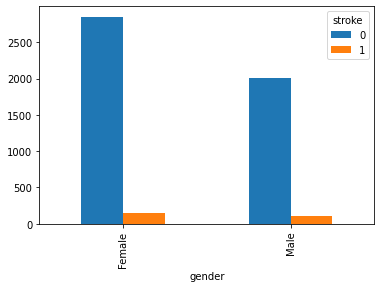

In [10]:
pd.crosstab(df['gender'],df.stroke).plot(kind='bar')

Gender is not Related to Stroke, so we will not use it.

<AxesSubplot:xlabel='ever_married'>

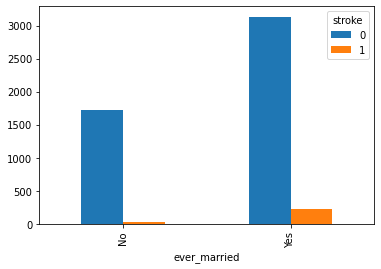

In [11]:
pd.crosstab(df['ever_married'],df.stroke).plot(kind='bar')

Married Person are more likely to be stroked.

<AxesSubplot:xlabel='work_type'>

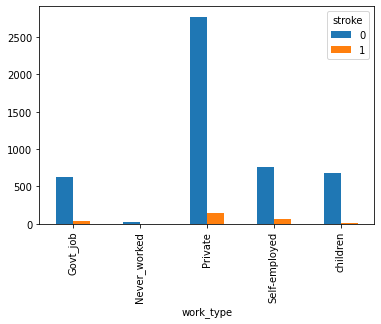

In [12]:
pd.crosstab(df['work_type'],df.stroke).plot(kind='bar')

Work Type is not Suitable for the Model

<AxesSubplot:xlabel='Residence_type'>

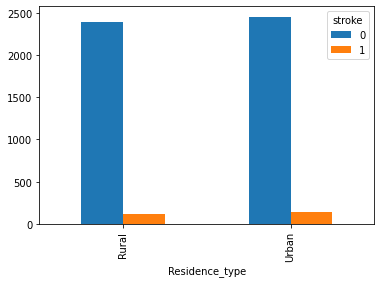

In [13]:
pd.crosstab(df['Residence_type'],df.stroke).plot(kind='bar')

Residence Type is not Suitable for the Model

<AxesSubplot:xlabel='smoking_status'>

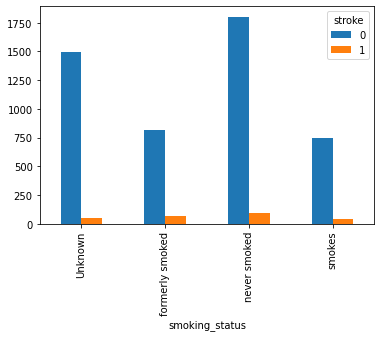

In [14]:
pd.crosstab(df['smoking_status'],df.stroke).plot(kind='bar')

Smoking Status is also not Suitable for the Model

In [15]:
marrieddata = pd.crosstab(df['ever_married'],df.stroke)

In [16]:
marrieddata

stroke,0,1
ever_married,,
No,1727,29
Yes,3133,220


In [17]:
N_st = marrieddata[0][0]+marrieddata[1][0]
st = marrieddata[0][1]+marrieddata[1][1]

In [18]:
Married_stroked_Percent = (marrieddata[1][1]/st) *100
Married_not_stroked_percent = (marrieddata[1][0]/N_st)*100

In [19]:
print(f'''
Married Person With Stroke Are {Married_stroked_Percent}%
Not Married Person with stroke Are {Married_not_stroked_percent}%
''')


Married Person With Stroke Are 6.56128839844915%
Not Married Person with stroke Are 1.6514806378132119%



After Deep Analysis Maried Person are more likely to get Stroked then non Married

### We Have Finalized Variables For Models

1. Age
2. Hypertension
3. heart_disease
4. ever_married
5. avg_glucose_level


### Finalizing DataFrame For Furthur Processing

In [20]:
newdf = df.drop(['id','gender','work_type','Residence_type','bmi','smoking_status'],axis=1)

## Model Developnment

converting String to Binary Number in Ever_married Variable

In [21]:
EverMarried = pd.get_dummies(newdf['ever_married']).drop('No',axis=1)

In [22]:
newdf['ever_married'] = EverMarried

In [23]:
newdf.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,67.0,0,1,1,228.69,1
1,61.0,0,0,1,202.21,1
2,80.0,0,1,1,105.92,1
3,49.0,0,0,1,171.23,1
4,79.0,1,0,1,174.12,1


In [24]:
x = newdf.drop('stroke',axis=1)
y = newdf.stroke

Creating Dateset for Training and Testing

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [26]:
Model = LogisticRegression()

In [27]:
Model.fit(x_train,y_train)

LogisticRegression()

In [28]:
Model.score(x_test,y_test)

0.9504240052185258

###### Our Model Score 95% 

### Saving Our Model

In [29]:
with open('Stroke_Prediction_Model', 'wb') as writer:
    pickle.dump(Model, writer)

Model Saved